In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

## Question 1


In [140]:
# Given data
battery_lifetimes = [495, 520, 510, 505, 480, 500, 515, 495, 510, 505, 490, 515, 495, 505, 500,
                     510, 485, 495, 500, 520, 510, 495, 505, 500, 515, 505, 495, 510, 500, 495]

In [141]:
claimed_mean = 500
std_dev = 100
alpha = 0.05
n = len(battery_lifetimes)

In [142]:
# Calculate sample statistics
sample_mean = np.mean(battery_lifetimes)
sample_std = np.std(battery_lifetimes, ddof=1)  # Using n-1 degrees of freedom

In [143]:
# Perform t-test
t_stat, p_value = stats.ttest_1samp(battery_lifetimes, claimed_mean)

In [144]:
# Calculate critical values for two-tailed test at alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df=n-1)

In [145]:
# Print results
print(f"Sample Mean: {sample_mean:.2f} hours")
print(f"Sample Standard Deviation: {sample_std:.2f} hours")
print(f"Null Hypothesis (H0): μ = {claimed_mean} hours")
print(f"Alternative Hypothesis (H1): μ ≠ {claimed_mean} hours")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical t-value (two-tailed): ±{critical_value:.4f}")

Sample Mean: 502.67 hours
Sample Standard Deviation: 9.80 hours
Null Hypothesis (H0): μ = 500 hours
Alternative Hypothesis (H1): μ ≠ 500 hours
t-statistic: 1.4900
p-value: 0.1470
Critical t-value (two-tailed): ±2.0452


In [146]:
# Decision
if p_value < alpha:
    print("Reject H0: There is significant evidence that the mean battery lifetime differs from 500 hours.")
else:
    print("Fail to reject H0: There is not enough evidence that the mean battery lifetime differs from 500 hours.")

Fail to reject H0: There is not enough evidence that the mean battery lifetime differs from 500 hours.


In [147]:
# Operating Characteristic (OC) Curve
def calculate_beta(true_mean, claimed_mean=500, std_dev=100, n=30, alpha=0.05):
    # Critical values for two-tailed test
    z_crit = stats.norm.ppf(1 - alpha/2)

    # Standard error of the mean
    se = std_dev / np.sqrt(n)

    # Upper critical value in original units
    upper_crit = claimed_mean + z_crit * se
    lower_crit = claimed_mean - z_crit * se

    # Calculate beta (probability of Type II error)
    beta_upper = stats.norm.cdf((upper_crit - true_mean) / se)
    beta_lower = stats.norm.cdf((true_mean - lower_crit) / se)

    # For a two-tailed test, beta is the probability that the sample mean falls within the acceptance region
    beta = beta_upper - beta_lower

    # Power = 1 - beta
    power = 1 - beta

    return beta, power

In [148]:
# Generate range of true means for OC curve
true_means = np.linspace(400, 600, 100)
betas = []
powers = []

In [149]:
for mean in true_means:
    beta, power = calculate_beta(mean)
    betas.append(beta)
    powers.append(power)

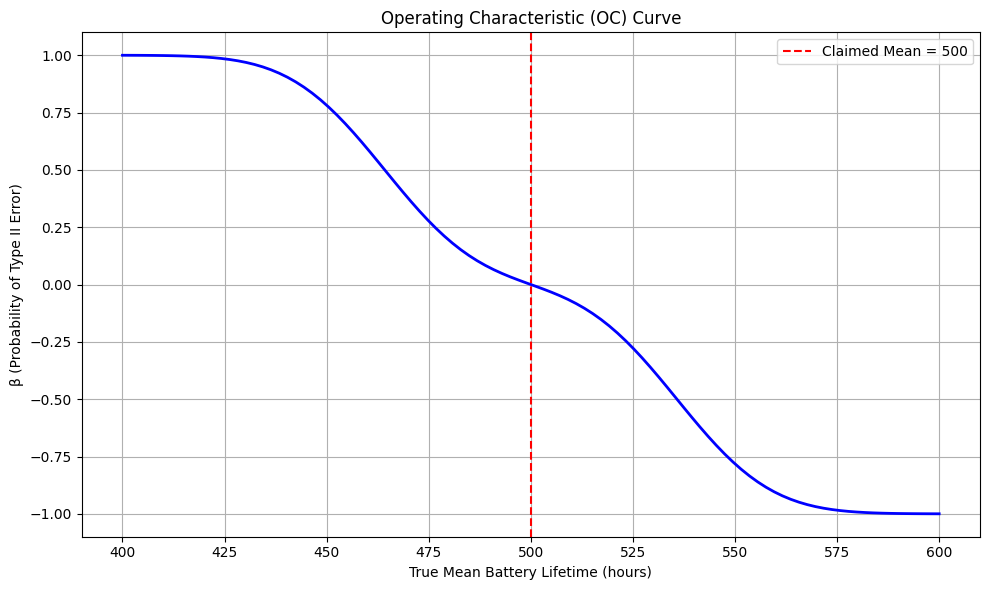

In [150]:
# Plot OC curve
plt.figure(figsize=(10, 6))
plt.plot(true_means, betas, 'b-', linewidth=2)
plt.axvline(x=claimed_mean, color='r', linestyle='--', label='Claimed Mean = 500')
plt.xlabel('True Mean Battery Lifetime (hours)')
plt.ylabel('β (Probability of Type II Error)')
plt.title('Operating Characteristic (OC) Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()

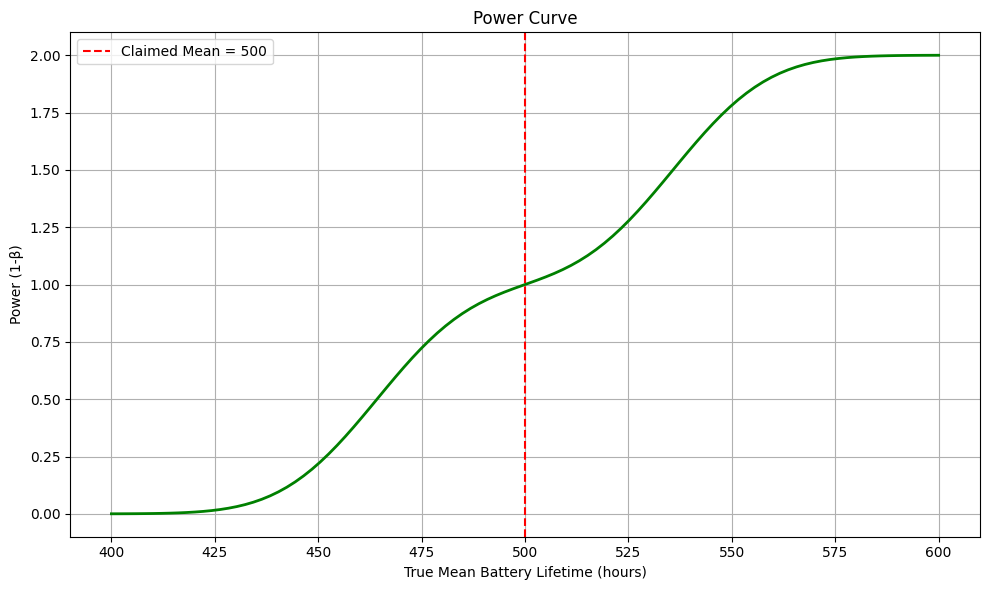

In [151]:
# Plot power curve
plt.figure(figsize=(10, 6))
plt.plot(true_means, powers, 'g-', linewidth=2)
plt.axvline(x=claimed_mean, color='r', linestyle='--', label='Claimed Mean = 500')
plt.xlabel('True Mean Battery Lifetime (hours)')
plt.ylabel('Power (1-β)')
plt.title('Power Curve')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [152]:
plt.show()

## Question 2

In [167]:
# Given data
water_usage = [340, 344, 362, 375, 356, 386, 354, 364, 332, 402, 340, 355, 362, 322, 372, 324, 318, 360, 338, 370]

In [168]:
claimed_mean = 350
known_variance = 144
alpha = 0.05
n = len(water_usage)

In [169]:
# Calculate sample statistics
sample_mean = np.mean(water_usage)
sample_std = np.std(water_usage, ddof=1)  # Using n-1 degrees of freedom

In [170]:
print(f"Sample Mean: {sample_mean:.2f} gallons")
print(f"Sample Standard Deviation: {sample_std:.2f} gallons")
print(f"Sample Size: {n}")
print(f"Claimed Mean (μ₀): {claimed_mean} gallons")

Sample Mean: 353.80 gallons
Sample Standard Deviation: 21.85 gallons
Sample Size: 20
Claimed Mean (μ₀): 350 gallons


In [171]:
# Case (a): Known population variance
print("Case (a): Known population variance (σ² = 144)")
print("-------------------------------------------")
print("Null Hypothesis (H₀): μ = 350 gallons")
print("Alternative Hypothesis (H₁): μ ≠ 350 gallons")

Case (a): Known population variance (σ² = 144)
-------------------------------------------
Null Hypothesis (H₀): μ = 350 gallons
Alternative Hypothesis (H₁): μ ≠ 350 gallons


In [172]:
# Calculate z-statistic
z_stat = (sample_mean - claimed_mean) / (np.sqrt(known_variance) / np.sqrt(n))
p_value_z = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed test

In [173]:
# Critical value for two-tailed test at alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)

In [174]:
print(f"z-statistic: {z_stat:.4f}")
print(f"p-value: {p_value_z:.4f}")
print(f"Critical z-value (two-tailed): ±{z_critical:.4f}")

z-statistic: 1.4162
p-value: 0.1567
Critical z-value (two-tailed): ±1.9600


In [175]:
# Decision for case (a)
if p_value_z < alpha:
    print("Decision: Reject H₀")
    print("Conclusion: There is sufficient evidence to contradict the official's claim that the mean water usage is 350 gallons per day.")
else:
    print("Decision: Fail to reject H₀")
    print("Conclusion: There is not sufficient evidence to contradict the official's claim that the mean water usage is 350 gallons per day.")

Decision: Fail to reject H₀
Conclusion: There is not sufficient evidence to contradict the official's claim that the mean water usage is 350 gallons per day.


In [176]:
# Case (b): Unknown population variance
print("\nCase (b): Unknown population variance")
print("-------------------------------------------")
print("Null Hypothesis (H₀): μ = 350 gallons")
print("Alternative Hypothesis (H₁): μ ≠ 350 gallons")


Case (b): Unknown population variance
-------------------------------------------
Null Hypothesis (H₀): μ = 350 gallons
Alternative Hypothesis (H₁): μ ≠ 350 gallons


In [177]:
# Calculate t-statistic
t_stat = (sample_mean - claimed_mean) / (sample_std / np.sqrt(n))
p_value_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))  # Two-tailed test

In [178]:
# Critical value for two-tailed test at alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)

In [179]:
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value_t:.4f}")
print(f"Critical t-value (two-tailed): ±{t_critical:.4f}")

t-statistic: 0.7778
p-value: 0.4462
Critical t-value (two-tailed): ±2.0930


In [180]:
# Decision for case (b)
if p_value_t < alpha:
    print("Decision: Reject H₀")
    print("Conclusion: There is sufficient evidence to contradict the official's claim that the mean water usage is 350 gallons per day.")
else:
    print("Decision: Fail to reject H₀")
    print("Conclusion: There is not sufficient evidence to contradict the official's claim that the mean water usage is 350 gallons per day.")

Decision: Fail to reject H₀
Conclusion: There is not sufficient evidence to contradict the official's claim that the mean water usage is 350 gallons per day.


In [181]:
# Visualize the results
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

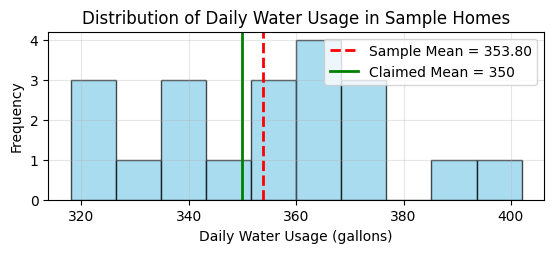

In [182]:
# Plot histogram of the data
plt.subplot(2, 1, 1)
plt.hist(water_usage, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean = {sample_mean:.2f}')
plt.axvline(claimed_mean, color='green', linestyle='-', linewidth=2, label=f'Claimed Mean = {claimed_mean}')
plt.xlabel('Daily Water Usage (gallons)')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Water Usage in Sample Homes')
plt.legend()
plt.grid(True, alpha=0.3)

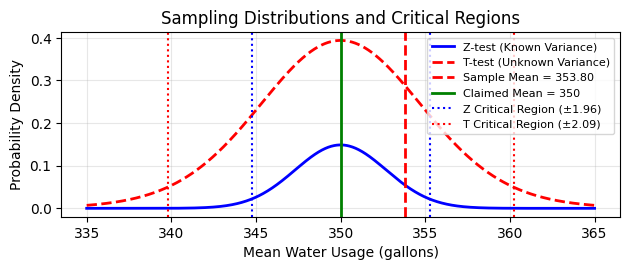

In [183]:
# Plot normal distributions for both tests
plt.subplot(2, 1, 2)
# For z-test (known variance)
x = np.linspace(335, 365, 1000)
y_z = stats.norm.pdf(x, claimed_mean, np.sqrt(known_variance/n))
plt.plot(x, y_z, 'b-', linewidth=2, label='Z-test (Known Variance)')
# For t-test (unknown variance)
y_t = stats.t.pdf((x - claimed_mean)/(sample_std/np.sqrt(n)), df=n-1)
plt.plot(x, y_t, 'r--', linewidth=2, label='T-test (Unknown Variance)')
# Add vertical lines for observed means and critical regions
plt.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean = {sample_mean:.2f}')
plt.axvline(claimed_mean, color='green', linestyle='-', linewidth=2, label=f'Claimed Mean = {claimed_mean}')
# Critical regions for z-test
z_lower = claimed_mean - z_critical * np.sqrt(known_variance/n)
z_upper = claimed_mean + z_critical * np.sqrt(known_variance/n)
plt.axvline(z_lower, color='blue', linestyle=':', linewidth=1.5, label=f'Z Critical Region (±{z_critical:.2f})')
plt.axvline(z_upper, color='blue', linestyle=':', linewidth=1.5)
# Critical regions for t-test
t_lower = claimed_mean - t_critical * sample_std/np.sqrt(n)
t_upper = claimed_mean + t_critical * sample_std/np.sqrt(n)
plt.axvline(t_lower, color='red', linestyle=':', linewidth=1.5, label=f'T Critical Region (±{t_critical:.2f})')
plt.axvline(t_upper, color='red', linestyle=':', linewidth=1.5)
plt.xlabel('Mean Water Usage (gallons)')
plt.ylabel('Probability Density')
plt.title('Sampling Distributions and Critical Regions')
plt.legend(loc='upper right', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Question 3

In [184]:
# Given data
participants = np.arange(1, 11)
weight_before = np.array([85.2, 78.5, 92.3, 80.0, 88.7, 76.4, 90.5, 84.1, 79.0, 86.2])
weight_after = np.array([82.5, 75.8, 90.1, 77.2, 85.4, 74.5, 87.6, 81.3, 76.8, 83.0])

In [185]:
# Create DataFrame for better visualization
df = pd.DataFrame({
    'Participant': participants,
    'Before (kg)': weight_before,
    'After (kg)': weight_after,
    'Difference (kg)': weight_before - weight_after
})

In [186]:
print("Data Summary:")
print(df)
print("\nDescriptive Statistics:")
print(df[['Before (kg)', 'After (kg)', 'Difference (kg)']].describe())

Data Summary:
   Participant  Before (kg)  After (kg)  Difference (kg)
0            1         85.2        82.5              2.7
1            2         78.5        75.8              2.7
2            3         92.3        90.1              2.2
3            4         80.0        77.2              2.8
4            5         88.7        85.4              3.3
5            6         76.4        74.5              1.9
6            7         90.5        87.6              2.9
7            8         84.1        81.3              2.8
8            9         79.0        76.8              2.2
9           10         86.2        83.0              3.2

Descriptive Statistics:
       Before (kg)  After (kg)  Difference (kg)
count    10.000000     10.0000        10.000000
mean     84.090000     81.4200         2.670000
std       5.461471      5.2881         0.447338
min      76.400000     74.5000         1.900000
25%      79.250000     76.9000         2.325000
50%      84.650000     81.9000         2.75000

In [187]:
# Step 1: Calculate the differences
weight_diff = weight_before - weight_after

In [103]:
# Step 2: Perform the paired t-test
# H0: μd = 0 (The diet has no effect on body weight)
# H1: μd ≠ 0 (The diet has a significant effect on body weight)
alpha = 0.05
t_stat, p_value = stats.ttest_rel(weight_before, weight_after)

In [188]:
# Step 3: Calculate degrees of freedom and critical t-value
df_value = len(participants) - 1
t_critical = stats.t.ppf(1 - alpha/2, df_value)

In [190]:
print("\nPaired t-test Results:")
print(f"Mean difference (Before - After): {np.mean(weight_diff):.2f} kg")
print(f"Standard deviation of differences: {np.std(weight_diff, ddof=1):.2f} kg")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Critical t-value (two-tailed, α = 0.05): ±{t_critical:.4f}")
print(f"Degrees of freedom: {df_value}")


Paired t-test Results:
Mean difference (Before - After): 2.67 kg
Standard deviation of differences: 0.45 kg
t-statistic: 0.7778
p-value: 0.1470
Critical t-value (two-tailed, α = 0.05): ±2.2622
Degrees of freedom: 9


In [191]:
# Step 4: State the conclusion
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is significant evidence that the diet plan affects body weight."
else:
    conclusion = "Fail to reject the null hypothesis. There is not enough evidence that the diet plan significantly affects body weight."

In [192]:
print(f"\nConclusion: {conclusion}")


Conclusion: Fail to reject the null hypothesis. There is not enough evidence that the diet plan significantly affects body weight.


In [193]:
# Create visualizations
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

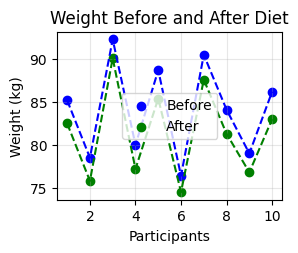

In [194]:
# Plot 1: Before vs After weights
plt.subplot(2, 2, 1)
plt.scatter(participants, weight_before, color='blue', label='Before')
plt.scatter(participants, weight_after, color='green', label='After')
plt.plot(participants, weight_before, 'b--')
plt.plot(participants, weight_after, 'g--')
plt.xlabel('Participants')
plt.ylabel('Weight (kg)')
plt.title('Weight Before and After Diet')
plt.grid(True, alpha=0.3)
plt.legend()

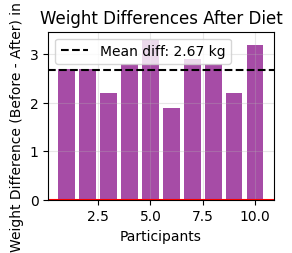

In [195]:
# Plot 2: Weight differences
plt.subplot(2, 2, 2)
plt.bar(participants, weight_diff, color='purple', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=np.mean(weight_diff), color='black', linestyle='--', label=f'Mean diff: {np.mean(weight_diff):.2f} kg')
plt.xlabel('Participants')
plt.ylabel('Weight Difference (Before - After) in kg')
plt.title('Weight Differences After Diet')
plt.grid(True, alpha=0.3)
plt.legend()

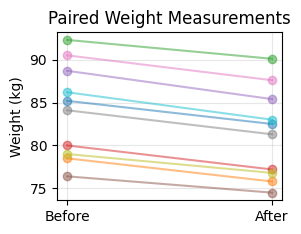

In [196]:
# Plot 3: Paired data
plt.subplot(2, 2, 3)
for i in range(len(participants)):
    plt.plot([1, 2], [weight_before[i], weight_after[i]], 'o-', alpha=0.5)
plt.xticks([1, 2], ['Before', 'After'])
plt.ylabel('Weight (kg)')
plt.title('Paired Weight Measurements')
plt.grid(True, alpha=0.3)

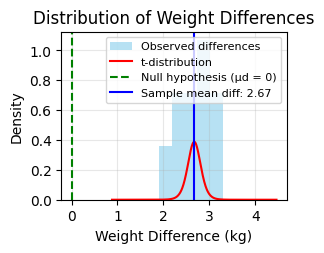

In [198]:
# Plot 4: Distribution of differences with t-distribution
plt.subplot(2, 2, 4)
diff_mean = np.mean(weight_diff)
diff_std = np.std(weight_diff, ddof=1)
x = np.linspace(diff_mean - 4*diff_std, diff_mean + 4*diff_std, 1000)
plt.hist(weight_diff, bins=5, density=True, color='skyblue', alpha=0.6, label='Observed differences')
plt.plot(x, stats.t.pdf((x - diff_mean)/(diff_std/np.sqrt(len(weight_diff))), df=df_value),
         'r-', label='t-distribution')
plt.axvline(x=0, color='green', linestyle='--', label='Null hypothesis (μd = 0)')
plt.axvline(x=diff_mean, color='blue', linestyle='-', label=f'Sample mean diff: {diff_mean:.2f}')
plt.xlabel('Weight Difference (kg)')
plt.ylabel('Density')
plt.title('Distribution of Weight Differences')
plt.legend(fontsize=8)
plt.grid(True, alpha=0.3)

In [199]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Question 4

In [201]:
# Given data
volumes = np.array([502, 498, 505, 497, 503, 499, 504, 496, 501, 500, 506, 495, 502, 498, 504])

In [202]:
claimed_variance = 4  # maximum variance claimed by manufacturer
alpha = 0.01  # significance level

In [203]:
# (i) Calculate the sample variance
sample_variance = np.var(volumes, ddof=1)  # using n-1 (sample variance)
sample_std = np.sqrt(sample_variance)

In [204]:
print(f"Sample Mean: {np.mean(volumes):.2f} mL")
print(f"Sample Variance: {sample_variance:.2f} mL²")
print(f"Sample Standard Deviation: {sample_std:.2f} mL")

Sample Mean: 500.67 mL
Sample Variance: 11.67 mL²
Sample Standard Deviation: 3.42 mL


In [205]:
# (ii) Perform a chi-square test
print(f"Null Hypothesis (H₀): σ² ≤ 4 mL² (Variance is within specification)")
print(f"Alternative Hypothesis (H₁): σ² > 4 mL² (Variance exceeds specification)")

Null Hypothesis (H₀): σ² ≤ 4 mL² (Variance is within specification)
Alternative Hypothesis (H₁): σ² > 4 mL² (Variance exceeds specification)


In [206]:
# Calculate chi-square statistic
n = len(volumes)
chi_square_stat = (n - 1) * sample_variance / claimed_variance

In [207]:
# Critical value (right-tailed test)
chi_square_critical = stats.chi2.ppf(1 - alpha, df=n-1)

In [208]:
# P-value (right-tailed test)
p_value = 1 - stats.chi2.cdf(chi_square_stat, df=n-1)

In [209]:
print(f"Sample Size (n): {n}")
print(f"Chi-square Statistic: {chi_square_stat:.4f}")
print(f"Critical Chi-square value (α = 0.01): {chi_square_critical:.4f}")
print(f"P-value: {p_value:.4f}")

Sample Size (n): 15
Chi-square Statistic: 40.8333
Critical Chi-square value (α = 0.01): 29.1412
P-value: 0.0002


In [211]:
# Decision
if chi_square_stat > chi_square_critical:
    conclusion = "Reject H₀: The evidence suggests the machine's variance exceeds specifications."
else:
    conclusion = "Fail to reject H₀: There is not enough evidence that the machine's variance exceeds specifications."

In [212]:
print(f"Conclusion: {conclusion}")

Conclusion: Reject H₀: The evidence suggests the machine's variance exceeds specifications.


In [215]:
# (iii) Investigate effect of removing outliers
outliers = [vol for vol in volumes if vol < 495 or vol > 505]
filtered_volumes = [vol for vol in volumes if 495 <= vol <= 505]

In [216]:
print(f"Identified potential outliers: {outliers}")
print(f"Number of data points after removal: {len(filtered_volumes)}")

Identified potential outliers: [np.int64(506)]
Number of data points after removal: 14


In [217]:
if len(filtered_volumes) == len(volumes):
    print("No outliers found in the dataset.")
else:
    # Recalculate statistics without outliers
    filtered_mean = np.mean(filtered_volumes)
    filtered_variance = np.var(filtered_volumes, ddof=1)
    filtered_std = np.sqrt(filtered_variance)

    print(f"Filtered Mean: {filtered_mean:.2f} mL")
    print(f"Filtered Variance: {filtered_variance:.2f} mL²")
    print(f"Filtered Standard Deviation: {filtered_std:.2f} mL")

    # Recalculate chi-square test without outliers
    n_filtered = len(filtered_volumes)
    chi_square_filtered = (n_filtered - 1) * filtered_variance / claimed_variance
    chi_critical_filtered = stats.chi2.ppf(1 - alpha, df=n_filtered-1)
    p_value_filtered = 1 - stats.chi2.cdf(chi_square_filtered, df=n_filtered-1)

    print(f"\nRevised Chi-square Statistic: {chi_square_filtered:.4f}")
    print(f"Revised Critical Chi-square value (α = 0.01): {chi_critical_filtered:.4f}")
    print(f"Revised P-value: {p_value_filtered:.4f}")

    if chi_square_filtered > chi_critical_filtered:
        filtered_conclusion = "Reject H₀: Even after removing outliers, the evidence suggests the machine's variance exceeds specifications."
    else:
        filtered_conclusion = "Fail to reject H₀: After removing outliers, there is not enough evidence that the machine's variance exceeds specifications."

    print(f"Revised Conclusion: {filtered_conclusion}")

Filtered Mean: 500.29 mL
Filtered Variance: 10.22 mL²
Filtered Standard Deviation: 3.20 mL

Revised Chi-square Statistic: 33.2143
Revised Critical Chi-square value (α = 0.01): 27.6882
Revised P-value: 0.0016
Revised Conclusion: Reject H₀: Even after removing outliers, the evidence suggests the machine's variance exceeds specifications.


In [218]:
# Create visualizations
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

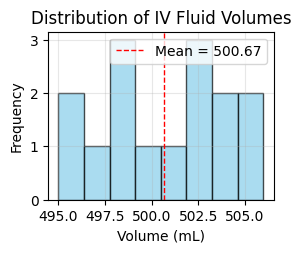

In [219]:
# Plot 1: Original data histogram
plt.subplot(2, 2, 1)
plt.hist(volumes, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(volumes), color='red', linestyle='dashed', linewidth=1, label=f'Mean = {np.mean(volumes):.2f}')
plt.xlabel('Volume (mL)')
plt.ylabel('Frequency')
plt.title('Distribution of IV Fluid Volumes')
plt.grid(True, alpha=0.3)
plt.legend()

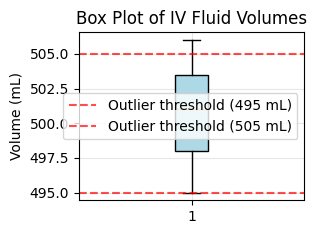

In [220]:
# Plot 2: Box plot with outliers highlighted
plt.subplot(2, 2, 2)
box = plt.boxplot(volumes, patch_artist=True)
for item in box['boxes']:
    item.set_facecolor('lightblue')
plt.axhline(y=495, color='red', linestyle='--', alpha=0.7, label='Outlier threshold (495 mL)')
plt.axhline(y=505, color='red', linestyle='--', alpha=0.7, label='Outlier threshold (505 mL)')
plt.ylabel('Volume (mL)')
plt.title('Box Plot of IV Fluid Volumes')
plt.grid(True, alpha=0.3)
plt.legend()

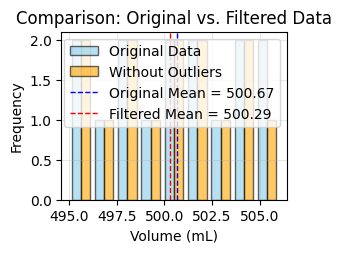

In [221]:
# Plot 3: Before and after outlier removal
plt.subplot(2, 2, 3)
# Calculate bins that work for both datasets
bins = np.linspace(min(min(volumes), min(filtered_volumes) if filtered_volumes else 0),
                   max(max(volumes), max(filtered_volumes) if filtered_volumes else 0),
                   10)
if len(filtered_volumes) < len(volumes):  # Only if outliers were found
    plt.hist([volumes, filtered_volumes], bins=bins,
             label=['Original Data', 'Without Outliers'],
             color=['skyblue', 'orange'], alpha=0.6, edgecolor='black')
    plt.axvline(np.mean(volumes), color='blue', linestyle='dashed', linewidth=1,
                label=f'Original Mean = {np.mean(volumes):.2f}')
    plt.axvline(np.mean(filtered_volumes), color='red', linestyle='dashed', linewidth=1,
                label=f'Filtered Mean = {np.mean(filtered_volumes):.2f}')
else:
    plt.hist(volumes, bins=bins, label='Original Data (No Outliers)',
             color='skyblue', alpha=0.7, edgecolor='black')
    plt.axvline(np.mean(volumes), color='blue', linestyle='dashed', linewidth=1,
                label=f'Mean = {np.mean(volumes):.2f}')
plt.xlabel('Volume (mL)')
plt.ylabel('Frequency')
plt.title('Comparison: Original vs. Filtered Data')
plt.grid(True, alpha=0.3)
plt.legend()

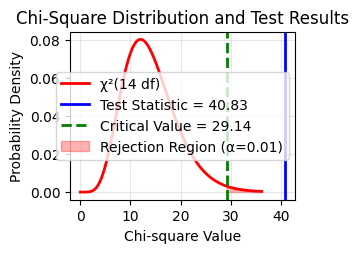

In [222]:
# Plot 4: Chi-square distribution with critical value and test statistic
plt.subplot(2, 2, 4)
x = np.linspace(0, stats.chi2.ppf(0.999, df=n-1), 1000)
plt.plot(x, stats.chi2.pdf(x, df=n-1), 'r-', lw=2, label=f'χ²({n-1} df)')
plt.axvline(chi_square_stat, color='blue', linestyle='-', linewidth=2,
            label=f'Test Statistic = {chi_square_stat:.2f}')
plt.axvline(chi_square_critical, color='green', linestyle='--', linewidth=2,
            label=f'Critical Value = {chi_square_critical:.2f}')
plt.fill_between(x, stats.chi2.pdf(x, df=n-1), where=(x >= chi_square_critical),
                 color='red', alpha=0.3, label='Rejection Region (α=0.01)')
plt.xlabel('Chi-square Value')
plt.ylabel('Probability Density')
plt.title('Chi-Square Distribution and Test Results')
plt.grid(True, alpha=0.3)
plt.legend()

In [223]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>